In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting
import numpy as np

ff1.Cache.enable_cache('2023Miami')
race = ff1.get_session(2023, 'Miami', 'R')
race_laps = race.load_laps(with_telemetry=True)
race.load()

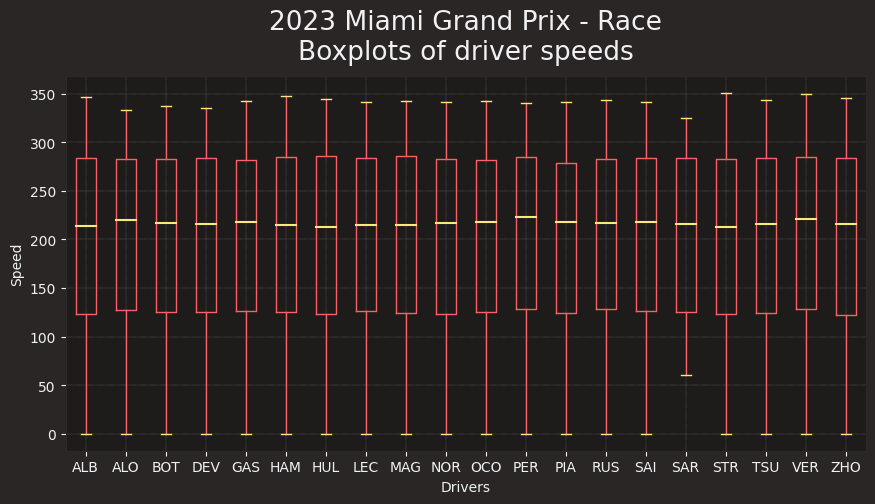

In [2]:
drivers = pd.unique(race.laps['Driver'])
tel_list = list()
for driver in drivers:
        drv_laps = race_laps.loc[(race_laps['PitOutTime'].isnull() & race_laps['PitInTime'].isnull())]
        drv_laps = race_laps.loc[((race_laps['Driver'] == driver) & (race_laps['IsAccurate']==True))]
        tel = drv_laps.pick_driver(driver).get_car_data()
        tel['Driver'] = driver
        tel_list.append(tel)

all_tel = pd.concat(tel_list)
all_tel = all_tel[['Speed', 'Driver']]
color="#F96167"
ff1.plotting.setup_mpl()
plt.rcParams['figure.figsize'] = [10, 5]
all_tel.boxplot(by='Driver', showfliers=False, medianprops=dict(linewidth=1.5, color="#FCE77D"), 
                      color=dict(boxes=color, whiskers=color, caps="#FCE77D"))
plt.grid(linestyle=':', linewidth=0.3)
plt.suptitle("")
plt.title(f"{race.event.year} {race.event.EventName} - {race.name}\nBoxplots of driver speeds")
plt.xlabel("Drivers")
plt.ylabel("Speed")
plt.show()